In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

from IPython.core.pylabtools import figsize

import statsmodels.api as sm
from patsy import dmatrix

In [2]:
df = pd.read_csv('~/src/properties_2016.csv')
df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
train_2016_df = pd.read_csv('~/src/train_2016.csv')
train_2016_df.tail()

,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [15]:
result_df = pd.merge(df, train_2016_df)
result_df.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
90270,11876798,1.0,NaN,646.88,3.0,4.0,NaN,4.0,3.0,NaN,...,388582.0,596082.0,2015.0,207500.0,7335.81,NaN,NaN,6.037201e+13,0.0276,2016-04-15
90271,12808516,NaN,NaN,646.88,2.0,3.0,NaN,7.0,2.0,NaN,...,86209.0,178408.0,2015.0,92199.0,2441.74,NaN,NaN,6.037407e+13,-0.1188,2016-06-07
90272,12010248,1.0,NaN,646.88,2.0,2.0,NaN,4.0,2.0,NaN,...,129000.0,420000.0,2015.0,291000.0,5070.41,NaN,NaN,6.037191e+13,0.0843,2016-06-30
90273,14310905,NaN,NaN,646.88,2.5,3.0,NaN,NaN,2.5,NaN,...,389474.0,1215816.0,2015.0,826342.0,12508.30,NaN,NaN,NaN,-0.0050,2016-03-31
90274,14636609,NaN,NaN,646.88,2.5,3.0,NaN,NaN,2.5,NaN,...,237048.0,471286.0,2015.0,234238.0,5470.12,NaN,NaN,NaN,0.0129,2016-09-13


In [13]:
# fillna

values = {
    'finishedsquarefeet6' : 1.,
    'finishedsquarefeet12' : 1.,
    'finishedsquarefeet13' : 1.,
    'finishedsquarefeet15' : 1.,
    'structuretaxvaluedollarcnt' : 1.,
    'landtaxvaluedollarcnt' : 1.,
    'calculatedbathnbr' : 1.,
    'calculatedfinishedsquarefeet' : 1827.16,
    'finishedfloor1squarefeet' : 1380.63,
    'poolcnt' : 1.0,
    'taxvaluedollarcnt' : 420478.99,
    'taxamount' : 5377.61,
    'basementsqft': 646.88,
    'bathroomcnt': 2.21,
    'bedroomcnt': 3.09,
    'threequarterbathnbr' : 1.0,
    'finishedsquarefeet50' : 1388.94,
    'fireplacecnt' : 1.17,
    'fullbathcnt' : 2.0,
    'garagecarcnt' : 2.0,
    'garagetotalsqft' : 383.77,
    'lotsizesquarefeet' : 22822.81,
    'numberofstories' : 1.0,
    'poolsizesum' : 519.71,
    'roomcnt' : 1.0,
    'unitcnt' : 1.0,
    'yardbuildingsqft17' : 319.80,
    'yardbuildingsqft26' : 278.30,
}

df.fillna(value=values, inplace=True)
df.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,646.88,2.21,3.09,NaN,NaN,1.0,NaN,...,1.0,NaN,1.0,420478.99,NaN,1.0,5377.61,NaN,NaN,NaN
2985213,14273630,NaN,NaN,646.88,2.21,3.09,NaN,NaN,1.0,NaN,...,1.0,NaN,1.0,420478.99,NaN,1.0,5377.61,NaN,NaN,NaN
2985214,168040630,NaN,NaN,646.88,2.21,3.09,NaN,NaN,1.0,NaN,...,1.0,NaN,1.0,420478.99,NaN,1.0,5377.61,NaN,NaN,NaN
2985215,168040830,NaN,NaN,646.88,2.21,3.09,NaN,NaN,1.0,NaN,...,1.0,NaN,1.0,420478.99,NaN,1.0,5377.61,NaN,NaN,NaN
2985216,168040430,NaN,NaN,646.88,2.21,3.09,NaN,NaN,1.0,NaN,...,1.0,NaN,1.0,420478.99,NaN,1.0,5377.61,NaN,NaN,NaN


## _logerror distribution_

In [6]:
logerror_df = train_2016_df.iloc[:, 1:2]
logerror_df.tail()

,logerror
90270,-0.0356
90271,0.0070
90272,-0.2679
90273,0.0602
90274,0.4207


In [7]:
np.mean(logerror_df.values), np.std(logerror_df.values)

(0.011457219606757128, 0.16107794320833071)

In [9]:
logerror_df.values

array([[ 0.0276],
       [-0.1684],
       [-0.004 ],
       ..., 
       [-0.2679],
       [ 0.0602],
       [ 0.4207]])

/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


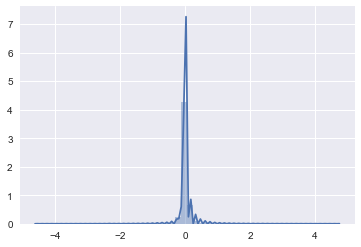

In [10]:
y = logerror_df.values
sns.distplot(y)
plt.show()

## _feature distribution_

/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

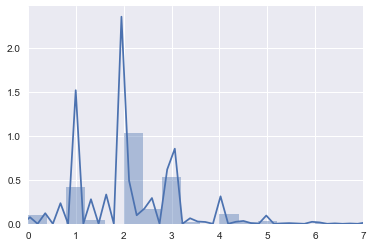

In [14]:
# bathroom

y = df['bathroomcnt'].values
sns.distplot(y)
plt.xlim([0, 7])
plt.plot()

/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

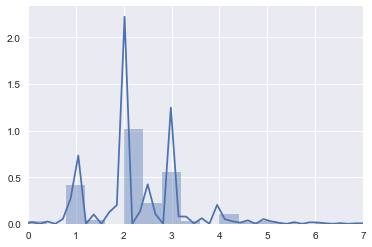

In [16]:
# bathroom

y = result_df['bathroomcnt'].values
sns.distplot(y)
plt.xlim([0, 7])
plt.plot()

/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

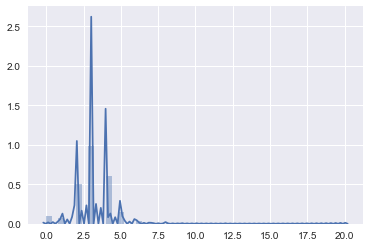

In [17]:
y = df['bedroomcnt'].values
sns.distplot(y)
# plt.xlim([0, 7])
plt.plot()

/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

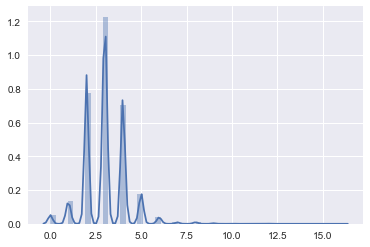

In [18]:
y = result_df['bedroomcnt'].values
sns.distplot(y)
# plt.xlim([0, 7])
plt.plot()

/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

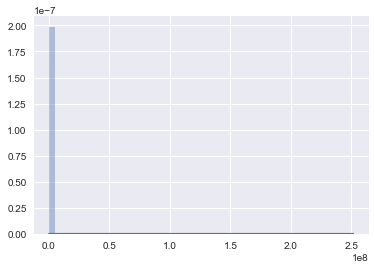

In [20]:
y = df['structuretaxvaluedollarcnt'].values
sns.distplot(y)
plt.plot()

/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


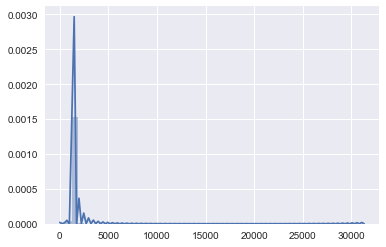

In [21]:
# finishedfloor1squarefeet

y = df['finishedfloor1squarefeet'].values
sns.distplot(y)
plt.show()


/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


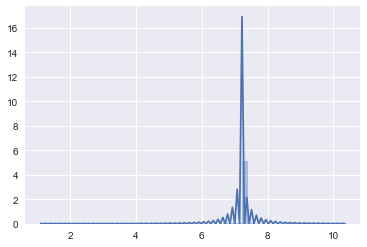

In [22]:
y = df['finishedfloor1squarefeet'].values
sns.distplot(np.log(y))
plt.show()


## _feature 간 관계 파악하기_

In [ ]:
# bathfamily_df : bathroomcnt, calculatedbathnbr, threequarterbathnbr, fullbathcnt

In [24]:
bathfamily = ["bathroomcnt", "calculatedbathnbr", "threequarterbathnbr", "fullbathcnt"]
bathfamily_df = df[bathfamily]
bathfamily_df.tail()

,bathroomcnt,calculatedbathnbr,threequarterbathnbr,fullbathcnt
2985212,2.21,1.0,1.0,2.0
2985213,2.21,1.0,1.0,2.0
2985214,2.21,1.0,1.0,2.0
2985215,2.21,1.0,1.0,2.0
2985216,2.21,1.0,1.0,2.0


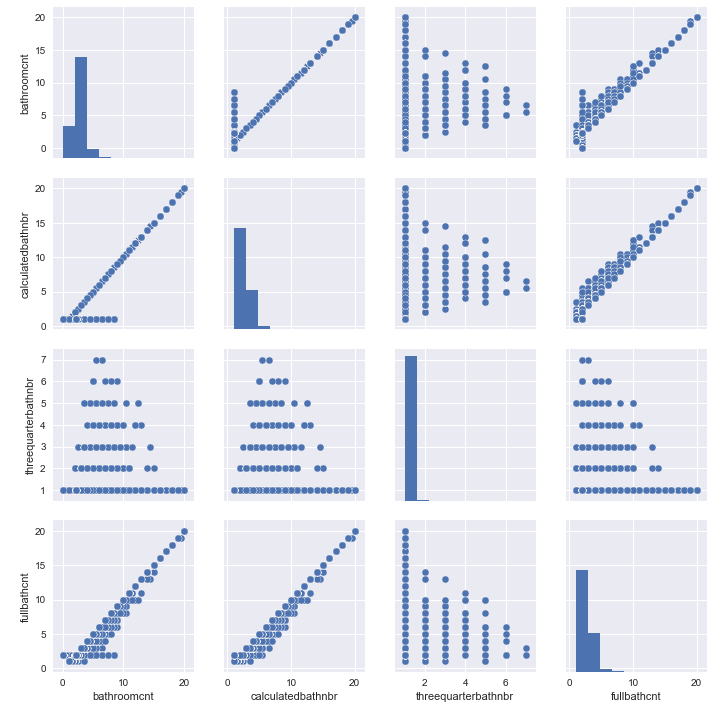

In [25]:
sns.pairplot(bathfamily_df)
plt.show()

#### _calculatedbathnbr :  Number of bathrooms in home including fractional bathroom_

- bathroomcnt와 거의 흡사하다. 그러나 방 갯수 0개인 데이터가 포함되지 않았다.

In [26]:
# taxfamily

taxfamily = ['taxvaluedollarcnt', 'structuretaxvaluedollarcnt',\
             'landtaxvaluedollarcnt', 'taxamount']
taxfamily_df = df[taxfamily]
taxfamily_df.tail()

,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
2985212,420478.99,1.0,1.0,5377.61
2985213,420478.99,1.0,1.0,5377.61
2985214,420478.99,1.0,1.0,5377.61
2985215,420478.99,1.0,1.0,5377.61
2985216,420478.99,1.0,1.0,5377.61


In [27]:
# 새로운 속성 structure+land 만들기

taxfamily_df['structure+land'] = taxfamily_df['structuretaxvaluedollarcnt'] + \
taxfamily_df['landtaxvaluedollarcnt']
taxfamily_df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,structure+land
2985212,420478.99,1.0,1.0,5377.61,2.0
2985213,420478.99,1.0,1.0,5377.61,2.0
2985214,420478.99,1.0,1.0,5377.61,2.0
2985215,420478.99,1.0,1.0,5377.61,2.0
2985216,420478.99,1.0,1.0,5377.61,2.0


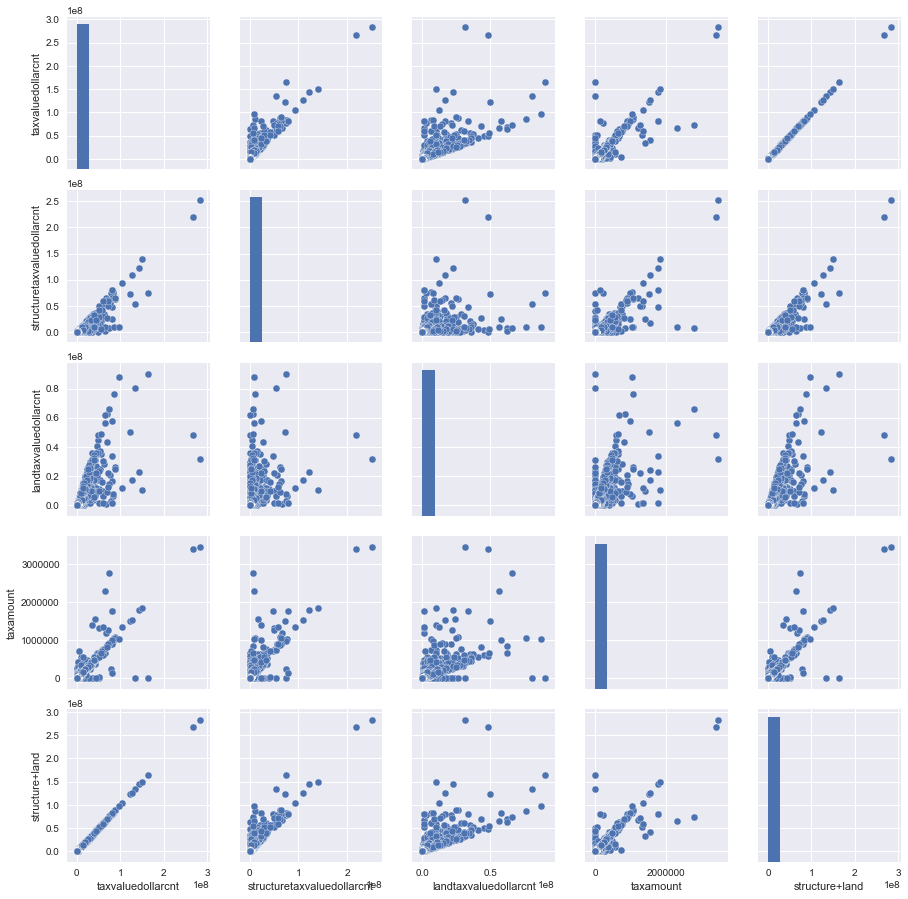

In [28]:
sns.pairplot(taxfamily_df)
plt.show()

In [29]:
# finishedsquarefeet family

finishedsquarefeet = ['finishedfloor1squarefeet','calculatedfinishedsquarefeet', \
                      'finishedsquarefeet6', 'finishedsquarefeet12',
                      'finishedsquarefeet13', 'finishedsquarefeet15', 
                      'finishedsquarefeet50']
finishedsquarefeet

['finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet6',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50']

In [ ]:
finishedsquarefeet_df = df[finishedsquarefeet]
finishedsquarefeet_df.tail()

## _Nan 처리하기_

In [ ]:
# taxamount로 taxvaluedollarcnt 추정하기

In [29]:
tax_df = df[['taxamount', 'taxvaluedollarcnt']]
tax_df.head(), len(tax_df), len(df)

(   taxamount  taxvaluedollarcnt
 0        NaN                9.0
 1        NaN            27516.0
 2   20800.37          1413387.0
 3   14557.57          1156834.0
 4    5725.17           433491.0, 2985217, 2985217)

In [30]:
tax_drop = tax_df.dropna()
tax_drop.tail()

,taxamount,taxvaluedollarcnt
2973773,6370.58,530550.0
2973775,5764.45,428749.0
2973776,7343.47,585100.0
2973777,6761.20,545688.0
2973778,7611.91,610967.0


In [32]:
print("교집합 : ", 42550 + 31250 - (len(df) - len(tax_drop)))
print("합집합 : ", (len(df) - len(tax_drop)))
print("taxvaluedollarcnt만 있는 Nan값의 수는 : ", 42550 - 18648)
print("taxamount만 있는 Nan값의 수는 : ", 31250 - 18648)
print("taxvaluedollarcnt, taxamount의 Nan을 제거하면", 55152 - 23902 - 12602)

교집합 :  18648
합집합 :  55152
taxvaluedollarcnt만 있는 Nan값의 수는 :  23902
taxamount만 있는 Nan값의 수는 :  12602
taxvaluedollarcnt, taxamount의 Nan을 제거하면 18648


In [33]:
# taxvaluedollarcnt와 taxamount 간 관계(tax_w) 찾기

tax_ratio = tax_drop.iloc[:, 1:2].values / tax_drop.iloc[:, :1].values
tax_w = np.mean(tax_ratio)
tax_w

77.89698539292354

In [ ]:
# taxvaluedollarcnt, taxamount를 tax_w를 사용해서 채워넣기

In [45]:
df['taxvaluedollarcnt'][122:125]

122    22266.074305
123    31126.077423
124    50132.162889
Name: taxvaluedollarcnt, dtype: float64

In [43]:
# taxamount >> taxvaluedollarcnt

df['taxvaluedollarcnt'].fillna(df['taxamount'] * tax_w, inplace=True)
df['taxvaluedollarcnt'].isna().sum()

18648

In [44]:
df['taxvaluedollarcnt'][122:125]

122    22266.074305
123    31126.077423
124    50132.162889
Name: taxvaluedollarcnt, dtype: float64

In [37]:
# taxvaluedollarcnt >> taxamount

In [46]:
df['taxamount'][:10]

0         NaN
1         NaN
2    20800.37
3    14557.57
4     5725.17
5     3661.28
6     6773.34
7     7857.84
8         NaN
9     4054.76
Name: taxamount, dtype: float64

In [47]:
df['taxamount'].fillna(df['taxvaluedollarcnt'] / tax_w, inplace=True)
df['taxamount'].isna().sum()

18648

In [48]:
df['taxamount'][:10]

0        0.115537
1      353.235749
2    20800.370000
3    14557.570000
4     5725.170000
5     3661.280000
6     6773.340000
7     7857.840000
8        0.115537
9     4054.760000
Name: taxamount, dtype: float64

In [50]:
df[['taxamount', 'taxvaluedollarcnt']].isna().sum()

taxamount            18648
taxvaluedollarcnt    18648
dtype: int64

In [51]:
df

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,9.0,2015.0,9.0,0.115537,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,27516.0,2015.0,27516.0,353.235749,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.370000,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,0.0,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.570000,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,0.0,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.170000,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,0.0,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.280000,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.340000,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.840000,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,9.0,2015.0,9.0,0.115537,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,0.0,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.760000,NaN,NaN,NaN
